![Water image](water.jpg)
***
# PREDICTING WATER PUMP STATUS IN TANZANIA
***

## BUSINESS UNDERSTANDING
***
###  **OVERVIEW**
***
Tanzania, the fifth most populus country in Africa, has expereinced significant economic growth over the years, however despite considerable investment in water supply infrastructure from donor funding and the government, a significant proportion of its population remains without proper access to improved drinking water.With their Millennium Development Goals (MDGs) to halve the proportion of people that do not have access to water services by 2015, Tanzania only increased its access to improved drinking water from 54 percent to 56 percent [JMP, 2015](https://www.unwater.org/sites/default/files/app/uploads/2020/04/WHOUNICEF-Joint-Monitoring-Program-for-Water-Supply-and-Sanitation-JMP-%e2%80%93-2015-Update_-ENG.pdf). The country now faces a difficult task of meeting the Sustainable Development Goals (SDGs) to provide universal coverage of safe water by 2030.

Despite their efforts one persistent problem that has adversely affected the country’s effort in increasing access to improved water  services  is  the  prevailing  high  levels  of  non-functionality  or  failures  of  its  current  water infrastructures  and  in  particular,  water points and while this issue is previlant in Africa, evidence indicates that the  problem  of water point failures  may  be relatively more serious in  Tanzania with some estimates putting the figure as high as 44 percent [Banks & Furey, 2016](https://www.researchgate.net/publication/312027512_What's_Working_Where_and_for_How_Long_A_2016_Water_Point_Update).

Using a variety of statistical methods,  we seek to understand the impact of various factors on water points failure and develop a model to predict the possibility of water pump failure with an accuracy and f1_score above 80%. 


## PROBLEM STATEMENT
***
> We have been tasked by World Bank Group together with the Government of Tanzania to seek a better understanding as to why water point failure is significantly higher in Tanzania as opposed to the rest of Africa as well as a way to reliably predict when water pumps shall fail as they tackle the difficult tast of meeting their 2030 MDG goals in Environmental Sustainability .


## OBJECTIVES

The research seeks to meet the following objectives:


**Analyze Factors Contributing to Water Point Failure:**

Identify and evaluate the various factors contributing to the high rate of water point failure in Tanzania compared to the rest of Africa.
Perform statistical analysis and data visualization to uncover patterns and correlations within the dataset.

**Develop a Predictive Model for Water Point Failure:**

Utilize machine learning algorithms to create a predictive model that can reliably forecast water point failures based on historical data.
Evaluate the performance of different models (e.g., logistic regression, decision trees, random forests) to identify the most accurate and robust predictor.

**Assess the Impact of Geographic and Demographic Variables:**

Investigate the influence of geographic (e.g., region, district) and demographic (e.g., population, funder) variables on water point functionality.
Map the spatial distribution of water point failures to identify high-risk areas and regions needing targeted interventions.


**Identify Key Indicators for Preventive Maintenance:**

Determine key indicators (e.g., construction year, installer, water quality) that can be monitored to predict and prevent water point failures.
Develop a set of recommendations for regular monitoring and maintenance practices based on the identified indicators.


**Provide Actionable Insights and Recommendations:**

Generate actionable insights for stakeholders, including the World Bank Group and the Government of Tanzania, to enhance water point management and sustainability.
Suggest policy and infrastructure improvements aimed at reducing water point failure rates and supporting the achievement of the 2030 MDG goals in Environmental Sustainability.


### DATA UNDERSTANDING
 ***
This research utilized data from [DRIVEN DATA](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/) about waterpoints. The dataset was split into three CSV files:
- **Training set values**
- **Training set labels**
- **Test set values**

The training and test datasets contained similar columns, while the training set labels dataset included one column, which was the focus of the study.

### Column Information

The following columns were provided in the training and testing datasets:

- **amount_tsh**: Total static head (amount of water available to waterpoint)
- **date_recorded**: The date the row was entered
- **funder**: Who funded the well
- **gps_height**: Altitude of the well
- **installer**: Organization that installed the well
- **longitude**: GPS coordinate
- **latitude**: GPS coordinate
- **wpt_name**: Name of the waterpoint if there is one
- **num_private**: [Missing information]
- **basin**: Geographic water basin
- **subvillage**: Geographic location
- **region**: Geographic location
- **region_code**: Geographic location (coded)
- **district_code**: Geographic location (coded)
- **lga**: Geographic location
- **ward**: Geographic location
- **population**: Population around the well
- **public_meeting**: True/False
- **recorded_by**: Group entering this row of data
- **scheme_management**: Who operates the waterpoint
- **scheme_name**: Who operates the waterpoint
- **permit**: If the waterpoint is permitted
- **construction_year**: Year the waterpoint was constructed
- **extraction_type**: The kind of extraction the waterpoint uses
- **extraction_type_group**: The kind of extraction the waterpoint uses
- **extraction_type_class**: The kind of extraction the waterpoint uses
- **management**: How the waterpoint is managed
- **management_group**: How the waterpoint is managed
- **payment**: What the water costs
- **payment_type**: What the water costs
- **water_quality**: The quality of the water
- **quality_group**: The quality of the water
- **quantity**: The quantity of water
- **quantity_group**: The quantity of water
- **source**: The source of the water
- **source_type**: The source of the water
- **source_class**: The source of the water
- **waterpoint_type**: The kind of waterpoint
- **waterpoint_type_group**: The kind of waterpoint

### Labels Information

The labels in the training set labels contained one column, **status_group**. This column indicates the condition of the waterpoint with the following possible outcomes:

- **functional**: The waterpoint is operational and there are no repairs needed
- **functional needs repair**: The waterpoint is operational, but needs repairs
- **non functional**: The waterpoint is not operational

### DATA PREPARATION
***
The following steps in summary shall be followed in the data preparation stage in preparation for Modeling in later stages

 **1. Data Loading**      
- Load the Datasets
         
- Inspect the Data

         
 **2. Data Cleaning**
 
- Handle Missing Values 
- Remove or Correct Erroneous Data
         
- Remove duplicate records
         
- Other cleaning techniques 

         
 **3. EXPLORATORY DATA ANALYSIS**
 
- Understand Data Distribution
         
- Identify Relationships - Univariate and Bivariate Analysis

         
<!--  **4. FEATURE ENGINEERING**
 
- Create New Features
         
- Encode Categorical Variables -->
 



### DATA LOADING 

In [1]:
import os 
import numpy as np
import pandas as pd

# Libraries for visualizations
import folium
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
# from difflib import SequenceMatcher

from itertools import combinations



C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:

class DataLoader:
    def __init__(self):      
        pass

    def read_data(self, file_path):
        _, file_ext = os.path.splitext(file_path)

        """
        Load data from a CSV, TSV, JSON or Excel file
        Parameter:
        file_path(str): Filepath of the file to be opened
        
        Returns:
        pd.DataFrame: The opened file as a dataframe
        """
        if file_ext == '.csv':
            return pd.read_csv(file_path, index_col=None)
        
        elif file_ext == '.tsv':
            return pd.read_csv(file_path, sep='\t')

        elif file_ext == '.json':
            return pd.read_json(file_path)

        elif file_ext in ['.xls', '.xlsx']:
            return pd.read_excel(file_path)

        else:
            raise ValueError(f"Unsupported file format:")
            
class DataFrameMerger:
    def __init__(self):
        pass
    
    def merge_dataframes(self, df1, df2, on, how='inner'):
        """
        Merge two dataframes on specified columns with the specified method.

        Parameters:
        df1 (pd.DataFrame): The first dataframe.
        df2 (pd.DataFrame): The second dataframe.
        on (str or list): Column or index level names to join on. These must be found in both DataFrames.
        how (str): Type of merge to be performed - 'left', 'right', 'outer', 'inner'. Default is 'inner'.
        suffixes (tuple): Suffix to apply to overlapping column names in the left and right side, respectively.

        Returns:
        pd.DataFrame: The merged dataframe.
        """
        merged_df = pd.merge(df1, df2, on=on, how=how)
        return merged_df.sort_values(by=merged_df.columns.tolist())
    
class DataInfo:
    def __init__(self,df):
        self.df = df

    def info(self): 
        
        # Counting no of rows 
        print(f'\nTotal Rows : {self.df.shape[0]} \n' + '--'*10 )
      
        # Counting no of columns
        print(f'\nTotal Columns : {self.df.shape[1]} \n' + '--'*10)
        
        # Extracting column names
        column_name =  self.df.columns 
        print(f'\nColumn Names\n' + '--'*10 +  f'\n{column_name} \n \n')
        
        # Data type info
        print(f'Data Summary\n' + '--'*10)
        data_summary = self.df.info() 
        
        # Total null values by each categories
        null_values = self.df.isnull().sum() 
        print(f'\nNull values\n' + '--'*10 + f'\n{null_values} \n \n')

        # Descriptive statistics
        describe =  self.df.describe() 
        print(f'\nDescriptive Statistics\n' + '--'*10 )
        display(describe)
        
        #Display the dataset
        print(f'\nDataset Overview\n'+ '--'*10)
        return self.df.head()
    
    

In [3]:
#Instantiate the loader class
data_loader = DataLoader()

# Loading the datasets
train_data=data_loader.read_data("data/train.csv")
train_labels=data_loader.read_data("data/train-labels.csv")
test_data=data_loader.read_data("data/test.csv")

# Instantiate the DF merger class
merger=DataFrameMerger()

# Merge the train data provided
data=merger.merge_dataframes(train_data, train_labels, on="id")


print(f'\nTimeLine of Recorded Data\n' + '--'*10 )
print(f"From:",data['date_recorded'].min(), "To:",  data['date_recorded'].max())

# Instantiate the Information class
information=DataInfo(data)

# Getting the info on the training DF
information.info()



TimeLine of Recorded Data
--------------------
From: 2002-10-14 To: 2013-12-03

Total Rows : 59400 
--------------------

Total Columns : 41 
--------------------

Column Names
--------------------
Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object') 
 

Data Summary
--------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000



Dataset Overview
--------------------


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
9410,0,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
18428,1,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
12119,2,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,0,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
10629,3,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2343,4,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,0,...,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional


**Initial Observations:**
***
> * There seem to be unique identifiers in the dataset that need to be investigated eg "id"
> * Some columns seem to carry repeated data based on data understanding and column names and should be investigated 
> * Numeric features seem to be mainly location identifiers
> * All column datatypes seem to be accurate except data_recorded
***

### DATA CLEANING
***

Data cleaning shall be carried out in the following steps:
1. Validity Check

2. Consistency Check

3. Uniformity Check

4. Completeness Check

In [4]:
class Validity:
    def __init__(self):       
        self.unique_identifier = []

    def find_unique_identifiers(self, df):
        """
        Loop through each column in a DataFrame, check for the distinct elements in each column, 
        if the sum is equal to 1 or equal to the length of the column value count, the column will be dropped

        Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

        Returns:
        pd.DataFrame: The DataFrame with specified columns dropped.
        list: A list of unique identifier columns and constant columns to be dropped.
        """
        df= df.copy()
        columns = df.columns

        for column in columns:
            if df[column].nunique() == len(df[column]):
                self.unique_identifier.append(column)
                print(f" Unique Identifier Columns:", column)
            elif df[column].nunique() == 1: 
                self.unique_identifier.append(column)
                print(f" Constant Columns:", column)
                         

        df = df.drop(columns=self.unique_identifier)
        
        display(df)

        return df
    
    
class Consistency:
    def __init__(self):       
        self.to_drop = []
        
    def duplicated_rows(self,df):
        df_sorted = df.sort_values(by=df.columns.tolist())

        # Find duplicated rows
        duplicates = df_sorted[df_sorted.duplicated(keep=False)]

        # Display the duplicated rows as HTML
        return display(HTML(duplicates.to_html()))
    
    def drop_duplicated_rows(self,df, rows=None):
        df.drop_duplicates(subset=rows, keep= "first", inplace= True)
        return df
        
    def find_duplicated_columns(self,df):
        """
         Loop through each column in a DataFrame, check the value counts,
         and return a list of pairs of columns with exactly similar value counts.

         Parameters:
         df (pd.DataFrame): The DataFrame to analyze.

         Returns:
         list: A list of pairs of columns with exactly similar value counts.
        """
        duplicated_columns = []
        columns = df.columns
        for i, col1 in enumerate(columns):
            for col2 in columns[i + 1:]:
                if df[col1].equals(df[col2]):
                    duplicated_columns.append((col1, col2))
        for pair in duplicated_columns:
                display(pair[0],(df[pair[0]].value_counts()))
                print("\n")
                display(pair[1],(df[pair[1]].value_counts())) 
                self.to_drop.append(pair[1])
        return display(f"Duplicated Columns:",duplicated_columns)
    
    
    def drop_duplicate_columns(self,df):
        df= df.drop(columns=self.to_drop)
        display(df.shape)
        return df
    
    
class Uniformity:
    def __init__(self):       
        self.categorical_columns = [] 
        self.numerical_columns =[]
        
    def convert_column_dtype(self,df, column_name, dtype):
        """
        Convert the data type of a column in a DataFrame.

        Parameters:
        - df (DataFrame): The DataFrame.
        - column_name (str): The name of the column to convert.
        - dtype (type): The target data type.

        Returns:
        - DataFrame: The DataFrame with the specified column's data type converted.
        """
        df[column_name] = df[column_name].astype(dtype).astype(dtype)
        
        return df      
    
    def column_seperation(self,df):
        
        for col in df.columns:
            if df[col].dtype == 'O':
                self.categorical_columns.append(col)
            else:
                self.numerical_columns.append(col)
                
        return self.numerical_columns, self.categorical_columns
    
    def detect_outliers_iqr(self, df):
        """
        Detect outliers in numerical columns using the IQR method.

        Parameters:
        - df (pd.DataFrame): The input DataFrame.

        Returns:
        - list: A list of column names that have outliers.
        """
        outlier_columns = []

        
        for column in self.numerical_columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
            
            if outlier_indices:  # Only include columns with outliers
                outlier_columns.append(column)
        
        return outlier_columns

    def plot_outliers(self, df, outlier_columns):
        """
        Plot boxplots for the columns that have outliers using Seaborn.

        Parameters:
        - df (pd.DataFrame): The input DataFrame.
        - outlier_columns (list): A list of column names that have outliers.
        """
        num_rows = (len(outlier_columns) + 2) // 3
        num_cols = min(len(outlier_columns), 3)
        fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 8))
        axes = axes.flatten()
        for i, column in enumerate(outlier_columns):
            sns.boxplot(x=df[column], ax=axes[i])
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Values')
            axes[i].set_title(f'{column}')
            axes[i].tick_params(axis='x', rotation=45)

        # Adjust layout to prevent overlapping
        plt.tight_layout()

        # Show the plots
        plt.show()
        
    
class Completeness:
    def __init__(self):  
        pass        
        
    def similarity(self, df, threshold=0.2):
        similar_columns = []

        # Calculate the similarity between each pair of columns
        for col1, col2 in combinations(df.columns, 2):
            set1, set2 = set(df[col1]), set(df[col2])
            intersection = len(set1 & set2)
            union = len(set1 | set2)
            similarity = intersection / union if union != 0 else 0

            # Check if similarity exceeds threshold
            if similarity > threshold:
                similar_columns.append((col1, col2))

        return similar_columns
    
    def similar_columns(self, df, similar_columns):
        for col1, col2 in similar_columns:
            print(f"Value counts for columns '{col1}' and '{col2}':")
            print("\nColumn '{}' value counts:".format(col1))
            print(df[col1].value_counts())
            print("\nColumn '{}' value counts:".format(col2))
            print(df[col2].value_counts())
            print("\n")
            
            
    def null_values(self, df):
        # Get features with null values
        features_with_null = df.columns[df.isnull().any()].tolist()
        
        # Calculate the number of missing values for each feature
        null_counts = df[features_with_null].isnull().sum()
        
        # Calculate the percentage of missing data for each feature
        null_percentages = df[features_with_null].isnull().mean() * 100
        
        # Create a DataFrame to display the results
        null_info = pd.DataFrame({
            'Column_Name': features_with_null,
            'Missing Values': null_counts,
            'Percentage Missing': null_percentages
        }).reset_index(drop=True)
        
        return null_info
    
    def handle_missing_values(self, df):
        """
        Handle missing values in the DataFrame.

        Parameters:
        - df (pd.DataFrame): The DataFrame to operate on.

        Returns:
        - pd.DataFrame: The DataFrame with missing values handled.
        """
        null_info = self.null_values(df)
        
        # Apply conditions for handling missing values
        for index, row in null_info.iterrows():
            if row['Percentage Missing'] < 5:
                # Drop rows with missing values
                df.dropna(subset=[row['Column_Name']], inplace= True)
            elif 5 <= row['Percentage Missing'] <= 10:
                # Replace missing values with "UNKNOWN"
                df[row['Column_Name']].fillna("UNKNOWN", inplace=True)
            else:
                # More than 10% missing, mark column for dropping
                print(f"Column '{row['Column_Name']}' has more than 10% missing values.")
                
        
        return df  # Return the DataFrame after handling missing values
            

***
**VALIDITY CHECK**
***
> - Check for unique identifiers i.e. distinct elements in a column that are equal to the length of the column value counts
> - Check for constant columns i.e. distinct elements in a column is equal to 1

In [5]:
# Checking for Validity on datset

# Instantiate the Validity check class
valid= Validity()

# Validate the training dataset
train_data=valid.find_unique_identifiers(data)

 Unique Identifier Columns: id
 Constant Columns: recorded_by


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
9410,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,0,Lake Tanganyika,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
18428,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,0,Rufiji,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
12119,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,0,Wami / Ruvu,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
10629,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,0,Pangani,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2343,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,0,Wami / Ruvu,...,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15137,0.0,2013-03-22,World Vision,1183,World vision,37.007726,-3.280868,Upendo Primary School,0,Pangani,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
8667,0.0,2011-04-12,Danida,0,DANIDA,33.724987,-8.940758,Kwa Mvulula,0,Rufiji,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
22584,0.0,2012-11-13,Ministry Of Water,1188,Hesawa,33.963539,-1.429477,Kwa Wambura Msege,0,Lake Victoria,...,soft,good,enough,enough,lake,river/lake,surface,communal standpipe multiple,communal standpipe,non functional
108,50.0,2011-03-07,Ruthe,1428,Ruthe,35.630481,-7.710549,none,0,Rufiji,...,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional


**Observations:** 
***
> - 1 column had unique identifiers i.e "id" column
> - 1 column had constant column identifiers i.e. "recorded_by" column
> - Dataset now has 59,400 rows and 39 columns 


***
**CONSISTENCY CHECK**
***
> - Duplicate check in rows and drop them
> - Duplicates Check in columns and drop them

In [6]:
# Checking for Consistency in rows dataset

# Instantiate the Consistency check class
const= Consistency()

# Visually Checking for duplicated rows 
duplicates= const.duplicated_rows(train_data)

# Dropping the duplicated rows
train_data=const.drop_duplicated_rows(train_data)
train_data.shape

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
39187,0.0,2011-07-13,He,0,HE,31.61953,-1.793342e+00,Kahindu,0,Lake Victoria,Ikondoa,Kagera,18,3,Muleba,Ikondo,0,True,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,improved spring,improved spring,functional
17451,0.0,2011-07-13,He,0,HE,31.61953,-1.793342e+00,Kahindu,0,Lake Victoria,Ikondoa,Kagera,18,3,Muleba,Ikondo,0,True,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,improved spring,improved spring,functional
326,0.0,2011-07-18,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Hospital,0,Lake Victoria,Nyanza,Mwanza,19,6,Geita,Kalangalala,0,True,VWC,Kalangalala,True,0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
40696,0.0,2011-07-18,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Hospital,0,Lake Victoria,Nyanza,Mwanza,19,6,Geita,Kalangalala,0,True,VWC,Kalangalala,True,0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
28518,0.0,2011-07-18,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Hospital,0,Lake Victoria,Nyanza,Mwanza,19,6,Geita,Kalangalala,0,True,VWC,Kalangalala,True,0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
56268,0.0,2011-07-18,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Nersing College,0,Lake Victoria,Nyanza,Mwanza,19,6,Geita,Kalangalala,0,True,VWC,Borehole,True,0,afridev,afridev,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump,functional
301,0.0,2011-07-18,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Nersing College,0,Lake Victoria,Nyanza,Mwanza,19,6,Geita,Kalangalala,0,True,VWC,Borehole,True,0,afridev,afridev,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump,functional
37439,0.0,2011-07-19,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,K/Secondary,0,Lake Victoria,Kisese,Mwanza,19,6,Geita,Kalangalala,0,True,VWC,14 Kambarage,True,0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
15097,0.0,2011-07-19,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,K/Secondary,0,Lake Victoria,Kisese,Mwanza,19,6,Geita,Kalangalala,0,True,VWC,14 Kambarage,True,0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
25928,0.0,2011-07-19,Government Of Tanzania,0,Government,0.00000,-2.000000e-08,Mulangila,0,Lake Victoria,14Kambalage,Mwanza,19,6,Geita,Kalangalala,0,True,VWC,14 Kambarage,True,0,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


(59364, 39)

**Observations:**
***
> - 36 rows are confirmed duplicates and have been dropped 
> - Dataset now has 59,364 rows and 39 columns

In [7]:
# Checking for Consistency in columns dataset

# Visually Checking for duplicated columns  
const.find_duplicated_columns(train_data)

# Dropping the duplicated columns
train_data=const.drop_duplicate_columns(train_data)


'quantity'

enough          33165
insufficient    15119
dry              6243
seasonal         4048
unknown           789
Name: quantity, dtype: int64

'quantity_group'

enough          33165
insufficient    15119
dry              6243
seasonal         4048
unknown           789
Name: quantity_group, dtype: int64

'Duplicated Columns:'

[('quantity', 'quantity_group')]

(59364, 38)

**Observations:**
***
> - 1 column visually confirmed to be a duplicate i.e. "quantity_group" and dropped
> - Dataset now has 59,364 rows and 38 columns

***
**UNIFORMITY CHECK**
***
- Assessing Data Distributions i.e. outliers
- Checking Data Types

Numerical Columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']
Columns with outliers detected using IQR method: ['amount_tsh', 'longitude', 'num_private', 'region_code', 'district_code', 'population']


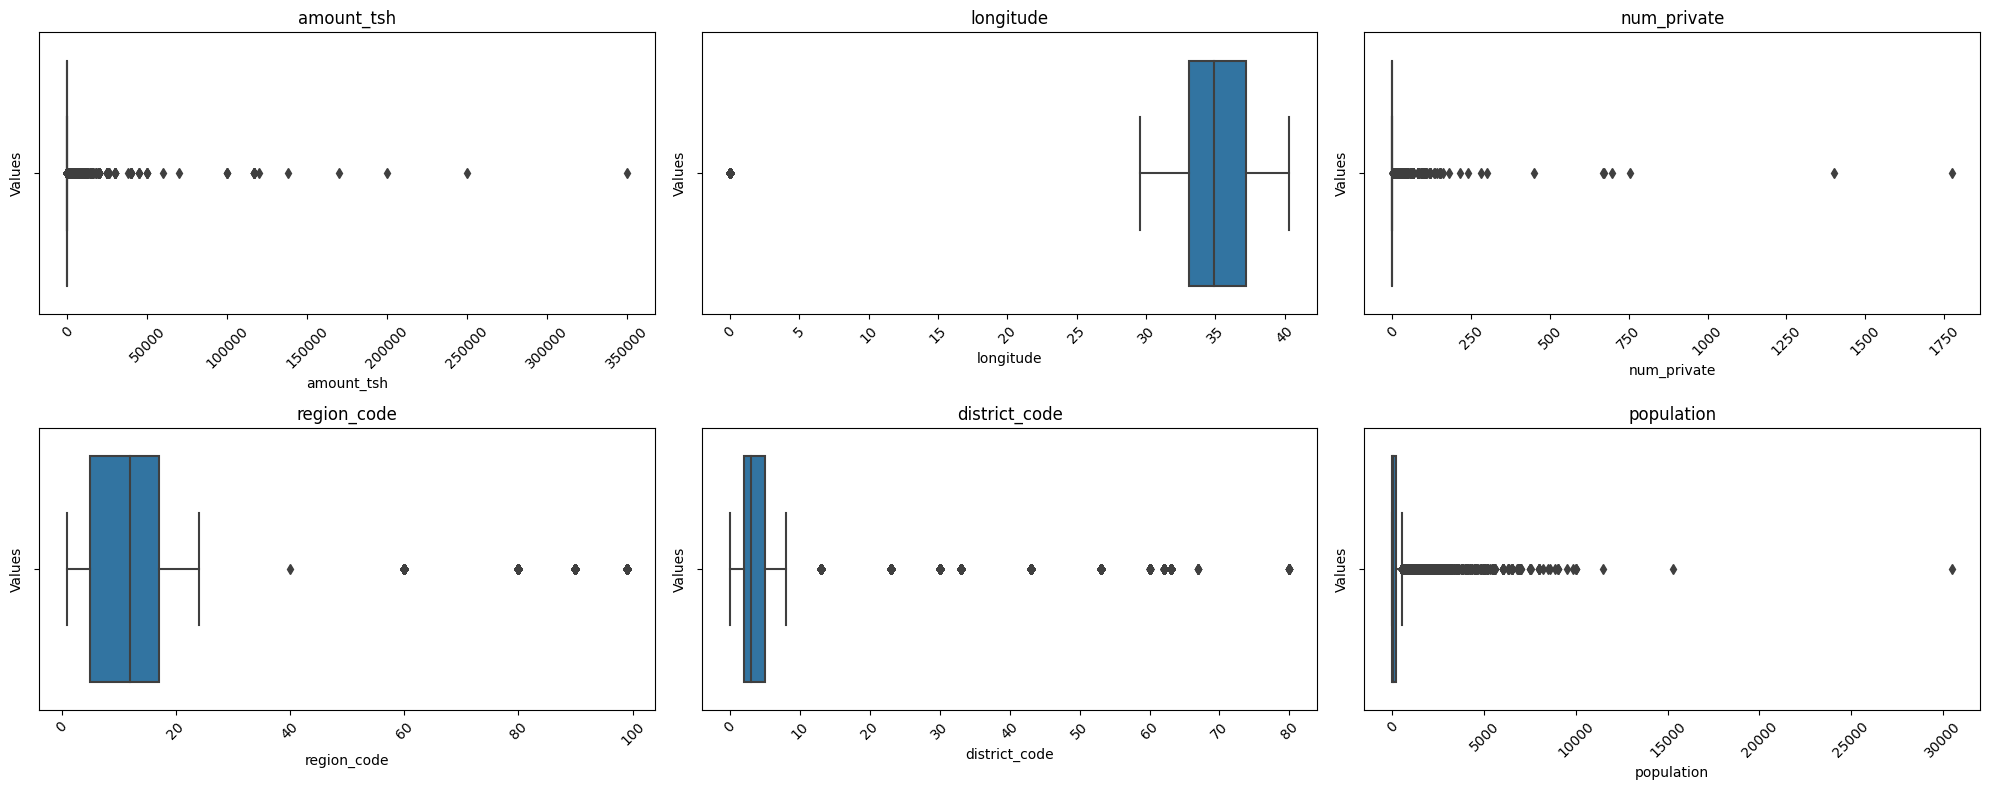

In [8]:
#Instantiate the Uniformity class
uniform = Uniformity()

# Separating the columns into numerical and categorical 
numerical_columns, categorical_columns=uniform.column_seperation(train_data)
print(f"Numerical Columns:",numerical_columns)

# Looking for Outliers in the numerical_columns
outlier_columns = uniform.detect_outliers_iqr(train_data)
print("Columns with outliers detected using IQR method:", outlier_columns)

# Plotting the columns with outliers
uniform.plot_outliers(train_data, outlier_columns)

**Observation:**
***
> - Region_code and District code are geographical code identifiers and shall be dropped since these codes regulary change and are not the current one based on their associated region columns [reference](https://www.iso.org/obp/ui/#iso:code:3166:TZ)
> - Num_private shall also be dropped as this column does not have accompanying data information.
> - Population and Amount-tsh (total static head) will not be dropped as they are valid points in the data
> - Longitude will require further analysis

In [9]:
features_to_drop=["region_code","district_code","num_private"]
train_data.drop(columns=features_to_drop, inplace=True)

# Check the outlier value for longitude based on the region column
train_data[train_data.longitude == 0]["region"].value_counts()

Shinyanga    1003
Mwanza        774
Name: region, dtype: int64

In [10]:
# Function to replace all outlier values with the median for the longitude column
def replace_zero_longitudes(df, longitude_col='longitude', region_col='region'):
    """
    Replace longitude values that are 0 with the median longitude of their respective regions.

    Parameters:
    - df (DataFrame): The DataFrame to operate on.
    - region_col (str): The name of the region column.
    - longitude_col (str): The name of the longitude column.

    Returns:
    - DataFrame: The DataFrame with longitude values replaced.
    - dict: A dictionary containing median longitude values for each region.
    """
    regions = df[region_col].unique()
    median_longitudes = {}
    
    for region in regions:
        median_longitude = df[df[region_col] == region][longitude_col].median()
        median_longitudes[region] = median_longitude
        df.loc[(df[region_col] == region) & (df[longitude_col] == 0), longitude_col] = median_longitude
    
    return df, median_longitudes

train_data, median_longitudes = replace_zero_longitudes(train_data)
print("\nMedian Longitude values used:")
print("----------------------------")
print("Shinyanga:",median_longitudes["Shinyanga"])
print("Mwanza:   ",median_longitudes["Mwanza"])
train_data



Median Longitude values used:
----------------------------
Shinyanga: 33.04787608
Mwanza:    32.99787276


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
9410,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,Lake Tanganyika,Majengo,...,unknown,milky,milky,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
18428,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,Rufiji,Magoda C,...,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
12119,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,Wami / Ruvu,Songambele,...,per bucket,soft,good,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
10629,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,Pangani,Urereni,...,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2343,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,Wami / Ruvu,Maata A,...,unknown,soft,good,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15137,0.0,2013-03-22,World Vision,1183,World vision,37.007726,-3.280868,Upendo Primary School,Pangani,Ntuwe,...,unknown,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
8667,0.0,2011-04-12,Danida,0,DANIDA,33.724987,-8.940758,Kwa Mvulula,Rufiji,Itete,...,on failure,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
22584,0.0,2012-11-13,Ministry Of Water,1188,Hesawa,33.963539,-1.429477,Kwa Wambura Msege,Lake Victoria,Ititwe,...,never pay,soft,good,enough,lake,river/lake,surface,communal standpipe multiple,communal standpipe,non functional
108,50.0,2011-03-07,Ruthe,1428,Ruthe,35.630481,-7.710549,none,Rufiji,Kidete,...,per bucket,soft,good,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional


**Observations:**
***
> - It was evident that the longitude column has been given an incorrect value of 0 for the some regions of Mwanza and Shinyanga.
> - The longitudes have been replaced by the median of the regions and is a suitable replacement and can be confirmed from [TZ_Cities_db](https://simplemaps.com/data/tz-cities)
> - Median was used as it is least affect by the outlier value. It would also give the most probably accurate value
> - Dataset has 59,364 rows and 35 columns

In [11]:
# Convert the list datatype to bool and return info on the data
list_to_bool=["permit", "public_meeting"]
uniform.convert_column_dtype(train_data, list_to_bool, bool).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59364 entries, 9410 to 39131
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59364 non-null  float64
 1   date_recorded          59364 non-null  object 
 2   funder                 55729 non-null  object 
 3   gps_height             59364 non-null  int64  
 4   installer              55709 non-null  object 
 5   longitude              59364 non-null  float64
 6   latitude               59364 non-null  float64
 7   wpt_name               59364 non-null  object 
 8   basin                  59364 non-null  object 
 9   subvillage             58993 non-null  object 
 10  region                 59364 non-null  object 
 11  lga                    59364 non-null  object 
 12  ward                   59364 non-null  object 
 13  population             59364 non-null  int64  
 14  public_meeting         59364 non-null  bool   
 15 

**Observation:**
***
> - Permit have now been accurately classified as boolean types
> - All other datatypes shall be used as is

***
**COMPLETENESS CHECK**
***
> - Check for similarity in columns
> - Check for Null values in all rows

In [12]:
# Checking for completeness in the dataset

# Instantiate the Completeness check class
comp= Completeness()

# Find columns that have similar distinct elements using a small threshold of 0.2
similar_columns=comp.similarity(train_data, threshold=0.2)
display(similar_columns)

# Visualling comparing similar columns
comp.similar_columns(train_data,similar_columns)

[('gps_height', 'population'),
 ('public_meeting', 'permit'),
 ('extraction_type', 'extraction_type_group'),
 ('extraction_type_group', 'extraction_type_class'),
 ('management', 'management_group'),
 ('payment', 'payment_type'),
 ('water_quality', 'quality_group'),
 ('source', 'source_type'),
 ('waterpoint_type', 'waterpoint_type_group')]

Value counts for columns 'gps_height' and 'population':

Column 'gps_height' value counts:
 0       20402
-15         60
-13         55
-16         55
 1290       52
         ...  
 2536        1
 2405        1
 2312        1
 2391        1
 2281        1
Name: gps_height, Length: 2428, dtype: int64

Column 'population' value counts:
0       21345
1        7025
200      1940
150      1892
250      1681
        ...  
1032        1
663         1
1893        1
2129        1
1523        1
Name: population, Length: 1049, dtype: int64


Value counts for columns 'public_meeting' and 'permit':

Column 'public_meeting' value counts:
True     54310
False     5054
Name: public_meeting, dtype: int64

Column 'permit' value counts:
True     41894
False    17470
Name: permit, dtype: int64


Value counts for columns 'extraction_type' and 'extraction_type_group':

Column 'extraction_type' value counts:
gravity                      26776
nira/tanira                   8143
other                         6

**Observations:**
***
  - After visually inspecting the column pairs,some columns bare similarity to each other and were dropped to avoid repeated data points.
  - The columns are:
>                  'waterpoint_type_group', 'source','water_quality', 'payment', 
>                  'management', 'extraction_type_group', 'extraction_type',


In [13]:
# Columns with null values 
comp.null_values(train_data)

,Column_Name,Missing Values,Percentage Missing
0,funder,3635,6.123240
1,installer,3655,6.156930
2,subvillage,371,0.624958
3,scheme_management,3877,6.530894
4,scheme_name,28139,47.400782


In [14]:
comp.handle_missing_values(train_data)

Column 'scheme_name' has more than 10% missing values.


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
9410,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,Lake Tanganyika,Majengo,...,unknown,milky,milky,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
18428,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,Rufiji,Magoda C,...,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
12119,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,Wami / Ruvu,Songambele,...,per bucket,soft,good,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
10629,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,Pangani,Urereni,...,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2343,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,Wami / Ruvu,Maata A,...,unknown,soft,good,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15137,0.0,2013-03-22,World Vision,1183,World vision,37.007726,-3.280868,Upendo Primary School,Pangani,Ntuwe,...,unknown,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
8667,0.0,2011-04-12,Danida,0,DANIDA,33.724987,-8.940758,Kwa Mvulula,Rufiji,Itete,...,on failure,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
22584,0.0,2012-11-13,Ministry Of Water,1188,Hesawa,33.963539,-1.429477,Kwa Wambura Msege,Lake Victoria,Ititwe,...,never pay,soft,good,enough,lake,river/lake,surface,communal standpipe multiple,communal standpipe,non functional
108,50.0,2011-03-07,Ruthe,1428,Ruthe,35.630481,-7.710549,none,Rufiji,Kidete,...,per bucket,soft,good,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional


**Observation:**
***
- The null values have been handled according to their percentage of missing values
> - Less than 5% values have had those rows dropped i.e. subvillage column
> - Between 5-10% have had their Nan Values replaced by Unknown i.e. scheme_management,funder and installer columns
> - Greater than 10% will be added to a features drop list to be dropped i,e, scheme_name column

In [15]:
# After visual inspection, generating list of similar columns to drop
features_to_drop=['waterpoint_type', 'source','water_quality', 'payment', 
                  'management', 'extraction_type_group', 'extraction_type',
                  'scheme_name',
                 ]
train_data.drop(columns=features_to_drop, inplace=True)
train_data.shape

(58993, 27)

**Observation:**
*** 
- The dataset now has 58,993 columns and 27 rows
- The dataset still has columns with very high cardinality. This shall be taken care of before modelling as they are still important for bivariate analysis
- It has distinct elements in each of its columns

In [16]:
train_data.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
9410,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,Lake Tanganyika,Majengo,...,0,handpump,user-group,unknown,milky,enough,shallow well,groundwater,hand pump,non functional
18428,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,Rufiji,Magoda C,...,2008,rope pump,user-group,never pay,good,enough,shallow well,groundwater,hand pump,functional
12119,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,Wami / Ruvu,Songambele,...,0,motorpump,user-group,per bucket,good,insufficient,borehole,groundwater,communal standpipe,functional
10629,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,Pangani,Urereni,...,1999,gravity,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,functional
2343,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,Wami / Ruvu,Maata A,...,0,handpump,user-group,unknown,good,dry,shallow well,groundwater,hand pump,non functional


## EXPLORATORY DATA ANALYSIS

Before commencing the EDA process, 2 factors need to be considered
> 1. The target variable i.e. status_group has 3 categories, feature engineering will be carried out to combine them to 2 categories i.e. functional and non_functional categories as this is out main focus for this project.
> 2. Age of the water points is of vital importanc

In [36]:
train_data.status_group.value_counts()

functional                 32032
non functional             22648
functional needs repair     4313
Name: status_group, dtype: int64

***
### FEATURE ENGINEERING
***
One of the featues we are interested is the age of the water points at the time of recording. This however is limited by the lack of a complete column but we shall be able to calculate garner some insight from it


In [17]:
train_data['year_recorded'] = pd.to_datetime(train_data['date_recorded']).dt.year

train_data["age"]= train_data["year_recorded"]-train_data["construction_year"]

In [18]:
train_data.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group,year_recorded,age
9410,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,Lake Tanganyika,Majengo,...,user-group,unknown,milky,enough,shallow well,groundwater,hand pump,non functional,2012,2012
18428,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,Rufiji,Magoda C,...,user-group,never pay,good,enough,shallow well,groundwater,hand pump,functional,2011,3
12119,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,Wami / Ruvu,Songambele,...,user-group,per bucket,good,insufficient,borehole,groundwater,communal standpipe,functional,2011,2011
10629,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,Pangani,Urereni,...,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,functional,2013,14
2343,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,Wami / Ruvu,Maata A,...,user-group,unknown,good,dry,shallow well,groundwater,hand pump,non functional,2011,2011


In [19]:
train_data["age"]= train_data["year_recorded"]-train_data["construction_year"]

In [34]:
aged_data=train_data[train_data["age"]<=100]
aged_data

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group,year_recorded,age
18428,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,Rufiji,Magoda C,...,user-group,never pay,good,enough,shallow well,groundwater,hand pump,functional,2011,3
10629,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,Pangani,Urereni,...,user-group,per bucket,good,enough,spring,groundwater,communal standpipe,functional,2013,14
35959,30.0,2011-03-09,Kwa Makala,64,Makala,38.663639,-5.805746,Kwa Makala,Pangani,Sokoni,...,commercial,per bucket,salty,insufficient,borehole,groundwater,communal standpipe,non functional,2011,4
21963,0.0,2013-03-14,World Bank,1332,World bank,36.756231,-3.373772,Moivaro Primary School,Pangani,Moivaro,...,user-group,unknown,good,insufficient,rainwater harvesting,surface,communal standpipe,non functional,2013,3
30059,0.0,2013-02-03,Songea District Council,1014,DWE,35.333713,-10.469638,Kwa Feristasi,Lake Nyasa,Amka Twende,...,user-group,on failure,good,dry,spring,groundwater,communal standpipe,non functional,2013,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49165,1000.0,2011-03-18,Government Of Tanzania,2140,Commu,33.926871,-8.960687,none,Rufiji,Chamani,...,user-group,on failure,good,enough,spring,groundwater,communal standpipe,non functional,2011,37
15137,0.0,2013-03-22,World Vision,1183,World vision,37.007726,-3.280868,Upendo Primary School,Pangani,Ntuwe,...,user-group,unknown,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013,1
22584,0.0,2012-11-13,Ministry Of Water,1188,Hesawa,33.963539,-1.429477,Kwa Wambura Msege,Lake Victoria,Ititwe,...,user-group,never pay,good,enough,river/lake,surface,communal standpipe,non functional,2012,29
108,50.0,2011-03-07,Ruthe,1428,Ruthe,35.630481,-7.710549,none,Rufiji,Kidete,...,user-group,per bucket,good,dry,spring,groundwater,communal standpipe,non functional,2011,11


In [32]:
train_data["construction_year"].value_counts()

0       20312
2010     2644
2008     2613
2009     2533
2000     2091
2007     1586
2006     1471
2003     1286
2011     1254
2004     1123
2012     1084
2002     1075
1978     1037
1995     1013
2005     1009
1999      978
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      707
1974      676
1997      644
1992      640
1993      608
2001      539
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [35]:
aged_data.groupby("region")[""]

1. Logistic Regression
Description: A basic yet powerful linear model for binary or multi-class classification.
Advantages: Simple, interpretable, and efficient for large datasets.
Disadvantages: May not capture complex relationships in the data.
2. Decision Trees
Description: A non-linear model that splits the data into subsets based on feature values.
Advantages: Easy to interpret and visualize; can capture non-linear relationships.
Disadvantages: Prone to overfitting, especially with complex trees.
3. Random Forest
Description: An ensemble method that builds multiple decision trees and combines their predictions.
Advantages: Robust to overfitting, handles missing values well, and captures non-linear relationships.
Disadvantages: Less interpretable than a single decision tree, can be computationally intensive.
4. Gradient Boosting Machines (GBM)
Description: An ensemble technique that builds trees sequentially, where each tree corrects errors from the previous one.
Popular Variants: XGBoost, LightGBM, and CatBoost.
Advantages: High predictive accuracy, can handle a variety of data types, and allows for extensive hyperparameter tuning.
Disadvantages: Requires careful tuning to prevent overfitting, longer training times.
5. Support Vector Machines (SVM)
Description: A model that finds the optimal hyperplane to separate different classes.
Advantages: Effective in high-dimensional spaces, robust to overfitting with proper regularization.
Disadvantages: Computationally intensive for large datasets, less interpretable.
6. Neural Networks
Description: A set of algorithms modeled after the human brain, capable of capturing complex patterns.
Advantages: Can model complex and non-linear relationships, highly flexible.
Disadvantages: Requires large amounts of data and computational resources, less interpretable.
7. k-Nearest Neighbors (k-NN)
Description: A non-parametric method that classifies a point based on the majority class of its neighbors.
Advantages: Simple to implement, no training phase.
Disadvantages: Computationally expensive during prediction, sensitive to the choice of k and distance metric.
8. Naive Bayes
Description: A probabilistic classifier based on Bayes' theorem, assuming independence between features.
Advantages: Simple, fast, and effective for certain types of data, especially text classification.
Disadvantages: Assumption of feature independence is often unrealistic.
9. Ensemble Methods
Description: Combine predictions from multiple models to improve overall performance.
Popular Techniques: Bagging (Bootstrap Aggregating), Boosting, Stacking.
Advantages: Often results in better performance and robustness than individual models.
Disadvantages: Can be complex to implement and interpret.
Recommended Approach
Data Exploration and Preprocessing:

Handle missing values, outliers, and categorical variables.
Feature engineering to create relevant predictors.
Baseline Model:

Start with a simple model like Logistic Regression or Decision Tree to establish a baseline performance.
Advanced Models:

Implement and compare more complex models such as Random Forest, Gradient Boosting Machines (e.g., XGBoost, LightGBM), and Neural Networks.
Hyperparameter Tuning:

Use techniques like Grid Search or Random Search with cross-validation to fine-tune model parameters.
Model Evaluation:

Use metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to evaluate model performance.
Perform stratified k-fold cross-validation to ensure robust performance estimates.
Model Interpretability:

Use tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret complex models.
Analyze feature importance to understand key drivers of pump status.
Ensemble Techniques:

Consider combining multiple models using ensemble methods like stacking or voting classifiers to improve performance.

Baseline Model:

python
Copy code
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)
print(classification_report(y_test, y_pred))
Advanced Model (e.g., Random Forest):

python
Copy code
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
Hyperparameter Tuning:

python
Copy code
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
By following this structured approach, you can effectively model and predict the operational status of water pumps, providing valuable insights for maintenance and resource allocation.

results
The  results  indicate that  water  points 
3managed by village  committees  had  a  much  higher  likelihood  of  failure  than those managed by  private operators or water authority. Factors that cannot be modified such as hydrogeological factors play a major role  in  determining  water  points failure during  the  first year  after  installation.    However, management type as well as the type of pump and technology matter considerably more in the short and medium term. These findings highlight the importance of utilizing information on the hydrological characteristics in the design, construction and maintenance of water points. On the other  hand, the technology of water points is a more important factor in explaining failure over time, controlling for other factors.  

In [19]:
train_data.select_dtypes(include="number")

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
9410,0.0,0,33.125828,-5.118154,0,14,3,0,0
18428,0.0,1978,34.770717,-9.395642,0,11,4,20,2008
12119,0.0,0,36.115056,-6.279268,0,1,4,0,0
10629,10.0,1639,37.147432,-3.187555,0,3,5,25,1999
2343,0.0,0,36.164893,-6.099289,0,1,4,0,0
...,...,...,...,...,...,...,...,...,...
15137,0.0,1183,37.007726,-3.280868,0,2,7,350,2012
8667,0.0,0,33.724987,-8.940758,0,12,2,0,0
22584,0.0,1188,33.963539,-1.429477,0,20,6,95,1983
108,50.0,1428,35.630481,-7.710549,0,11,1,1,2000


In [28]:
import pandas as pd

def find_outliers_IQR(df):
    outlier_indices = []
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    if numerical_cols.empty:
        print("No numerical columns found in the DataFrame.")
        return pd.DataFrame()  # Return an empty DataFrame if no numerical columns are present
    
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers for each numerical column
    for col in numerical_cols:
        outliers = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]
        if not outliers.empty:
            outlier_indices.extend(outliers.index)
    
    if not outlier_indices:
        print("No outliers found using IQR method.")
        return pd.DataFrame()  # Return an empty DataFrame if no outliers are found
    
    # Filter outlier indices to ensure they are within DataFrame index bounds
    outlier_indices = [idx for idx in outlier_indices if idx in df.index]
    
    if not outlier_indices:
        print("No valid outlier indices found.")
        return pd.DataFrame()  # Return an empty DataFrame if no valid outlier indices are found
    
    outlier_indices = list(set(outlier_indices))  # Get unique indices
    return df.loc[outlier_indices]


In [29]:
find_outliers_IQR(train_data)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
10,0.0,2011-02-20,Private,62,Private,39.209518,-7.034139,Mzee Hokororo,0,Wami / Ruvu,...,never pay,salty,salty,enough,machine dbh,borehole,groundwater,other,other,functional
11,200.0,2013-02-18,Danida,1062,DANIDA,35.770258,-10.574175,Kwa Alid Nchimbi,0,Lake Nyasa,...,on failure,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
16,500.0,2011-07-04,Unicef,1703,DWE,34.642439,-9.106185,Kwa John Mtenzi,0,Rufiji,...,monthly,soft,good,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59386,0.0,2011-08-22,Adb,1786,DWE,31.738789,-8.532013,Shule Ya Sekondari Katazi,0,Lake Rukwa,...,never pay,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59387,100.0,2013-03-12,0,25,0,39.176480,-6.957098,Kwa Maliba,0,Wami / Ruvu,...,per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
59389,0.0,2011-08-06,Co,783,DWE,30.646486,-7.365418,Sekondari,0,Lake Tanganyika,...,never pay,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59394,500.0,2011-03-09,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,0,Wami / Ruvu,...,monthly,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
